# Decomposition of Hydrogen Peroxide

The decomposition of hydrogen peroxide in solution, catalyzed by iodide ions \( I^- \), is represented by the following reaction:

\[
2H_2O_2 \xrightarrow{I^-} 2H_2O + O_2
\]

This reaction follows **pseudo-first-order kinetics** with respect to hydrogen peroxide, with a rate constant:

\[
k = 0.05 \, min^{-1}
\]

## Tasks
1. Write a Python program to calculate the concentration of \( H_2O_2 \) as a function of time over **60 minutes** (with time intervals of **1 minute**).
2. Plot the concentration of \( H_2O_2 \) versus time.
3. Simultaneously plot the concentration of **oxygen gas** \( O_2 \) formed over time.
4. Add appropriate labels, titles, and legends to the plot.

## Hints
- The concentration of hydrogen peroxide at time \( t \) is given by:

\[
[H_2O_2](t) = [H_2O_2]_0 e^{-kt}
\]

- The concentration of oxygen gas produced is:

\[
[O_2](t) = \frac{[H_2O_2]_0}{2} (1 - e^{-kt})
\]

## Initial Conditions
- \( [H_2O_2]_0 = 0.1 \, mol/L \)
- \( k = 0.05 \, min^{-1} \)
- Time range: **0 to 60 minutes**


In [1]:
import numpy as np
from chempy import kinetics

In [18]:
M0=0.1
k=0.05

def C_H2O2_t(C0,k,t):
    return C0*np.exp(-k*t)
print(f'The concentration of H2O2 after 60 mins is {C_H2O2_t(M0,k,60)}')

def C_O2_t(C0,k,t):
    return 0.5*C0*(1-np.exp(-k*t))

The concentration of H2O2 after 60 mins is 0.004978706836786395


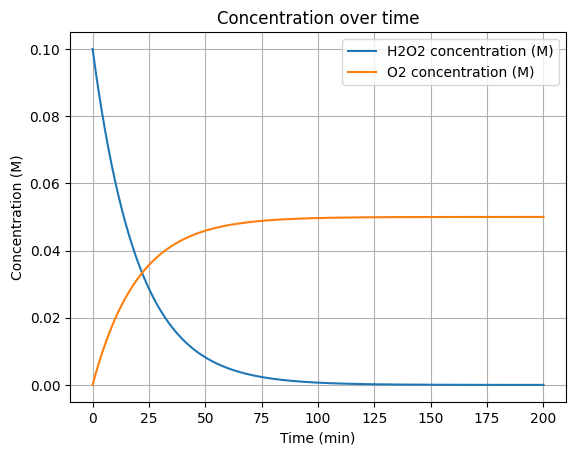

In [45]:
import matplotlib.pyplot as plt
x = np.linspace(0,200,10000)
y = [C_H2O2_t(M0, k, x_i) for x_i in x]
O2 = [C_O2_t(M0,k,x_i) for x_i in x]
plt.plot(x,y, label='H2O2 concentration (M)')
plt.plot(x,O2, label='O2 concentration (M)')
plt.xlabel('Time (min)')
plt.ylabel('Concentration (M)')
plt.title('Concentration over time')
plt.grid(True)
plt.legend();

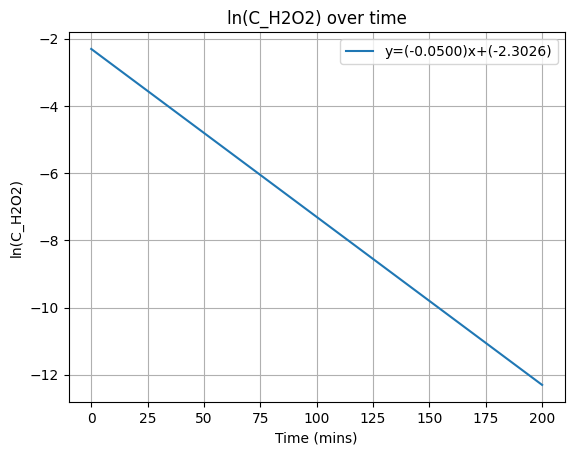

In [44]:
from scipy.optimize import curve_fit
def func(x,a,b):
    return a*x+b
log_y = [np.log(C_H2O2_t(M0, k, x_i)) for x_i in x]
popt, pcov =curve_fit(func, x, log_y, p0=(0,np.log(0.1)))
line=f'y=({popt[0]:.4f})x+({popt[1]:.4f})'

plt.plot(x, log_y, label=line)
plt.xlabel('Time (mins)')
plt.ylabel('ln(C_H2O2)')
plt.title('ln(C_H2O2) over time')
plt.grid(True)
plt.legend();